# SVM

In [1]:
import pandas as pd

In [33]:
data = pd.read_csv("df_cleaned_83.csv")
print(data.columns)
print(data.head())
for c in list(data.keys()):
    print(str(c)+str(type(data[c][0])))

Index(['Species', 'Population', 'Latitude', 'Longitude', 'Year_start',
       'Year_end', 'Temperature', 'Vial', 'Replicate', 'Sex', 'Thorax_length',
       'l2', 'l3p', 'l3d', 'lpd', 'l3', 'w1', 'w2', 'w3', 'wing_loading',
       'distance_from_first'],
      dtype='object')
       Species Population  Latitude  Longitude  Year_start  Year_end  \
0  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
1  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
2  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
3  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
4  D._aldrichi    Binjour    -25.52     151.45        1994      1994   

   Temperature  Vial  Replicate     Sex  ...     l2    l3p    l3d    lpd  \
0           20     1          1  female  ...  2.017  0.659  1.711  2.370   
1           20     1          1    male  ...  1.811  0.609  1.539  2.148   
2           20     1          2  female  ...  1.985  0.648  1.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              1729 non-null   object 
 1   Population           1729 non-null   object 
 2   Latitude             1729 non-null   float64
 3   Longitude            1729 non-null   float64
 4   Year_start           1729 non-null   int64  
 5   Year_end             1729 non-null   int64  
 6   Temperature          1729 non-null   int64  
 7   Vial                 1729 non-null   int64  
 8   Replicate            1729 non-null   int64  
 9   Sex                  1729 non-null   object 
 10  Thorax_length        1729 non-null   object 
 11  l2                   1729 non-null   float64
 12  l3p                  1729 non-null   float64
 13  l3d                  1729 non-null   float64
 14  lpd                  1729 non-null   float64
 15  l3                   1729 non-null   f

In [35]:
unique_species = data['Species'].unique()
print(f"Unique values in 'Species' column: {unique_species}")

Unique values in 'Species' column: ['D._aldrichi' 'D._buzzatii']


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 假设data是包含上述数据的pandas DataFrame

# 数据预处理
# 对于Species, wing_loading, Sex等字符串列进行编码
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)  # 设置sparse=False以得到一个numpy数组

# 假设Species, wing_loading, Sex是字符串列
# 对'Species'列进行编码
species_encoded = pd.DataFrame(onehot_encoder.fit_transform(data[['Species']]))
species_encoded.columns = onehot_encoder.get_feature_names_out(['Species'])

# 对'Population'列进行编码
population_encoded = pd.DataFrame(onehot_encoder.fit_transform(data[['Population']]))
population_encoded.columns = onehot_encoder.get_feature_names_out(['Population'])

# 对'Sex'列进行编码
sex_encoded = pd.DataFrame(label_encoder.fit_transform(data[['Sex']]))
sex_encoded.columns = ["Sex"]

# 对'wing_loading'列进行编码
wing_loading_encoded = pd.DataFrame(onehot_encoder.fit_transform(data[['wing_loading']]))
wing_loading_encoded.columns = onehot_encoder.get_feature_names_out(['wing_loading'])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is i

In [37]:
print(species_encoded)
print(wing_loading_encoded)
print(population_encoded)
print(sex_encoded)

      Species_D._aldrichi  Species_D._buzzatii
0                     1.0                  0.0
1                     1.0                  0.0
2                     1.0                  0.0
3                     1.0                  0.0
4                     1.0                  0.0
...                   ...                  ...
1724                  0.0                  1.0
1725                  0.0                  1.0
1726                  0.0                  1.0
1727                  0.0                  1.0
1728                  0.0                  1.0

[1729 rows x 2 columns]
      wing_loading_.  wing_loading_1.550  wing_loading_1.589  \
0                0.0                 0.0                 0.0   
1                0.0                 0.0                 0.0   
2                0.0                 0.0                 0.0   
3                0.0                 0.0                 0.0   
4                0.0                 0.0                 0.0   
...              ...       

In [38]:
# 将编码后的列添加回原始DataFrame
data.drop(['Species', 'wing_loading', 'Sex', 'Population'], axis=1, inplace=True)
data = pd.concat([data, species_encoded, wing_loading_encoded, population_encoded], axis=1)

# 将Thorax_length从字符串转换为数值型
data['Thorax_length'] = pd.to_numeric(data['Thorax_length'], errors='coerce')

In [39]:
# print(data.columns)
tmp = data.head()
for k in list(tmp.keys()):
    print(k)
    print(tmp[k][0])
print(len(list(tmp.keys())))

Latitude
-25.52
Longitude
151.45
Year_start
1994
Year_end
1994
Temperature
20
Vial
1
Replicate
1
Thorax_length
1.238
l2
2.017
l3p
0.659
l3d
1.711
lpd
2.37
l3
2.37
w1
1.032
w2
1.441
w3
1.192
distance_from_first
0.0
Species_D._aldrichi
1.0
Species_D._buzzatii
0.0
wing_loading_.
0.0
wing_loading_1.550
0.0
wing_loading_1.589
0.0
wing_loading_1.623
0.0
wing_loading_1.628
0.0
wing_loading_1.629
0.0
wing_loading_1.631
0.0
wing_loading_1.632
0.0
wing_loading_1.636
0.0
wing_loading_1.640
0.0
wing_loading_1.649
0.0
wing_loading_1.650
0.0
wing_loading_1.651
0.0
wing_loading_1.652
0.0
wing_loading_1.653
0.0
wing_loading_1.655
0.0
wing_loading_1.656
0.0
wing_loading_1.657
0.0
wing_loading_1.658
0.0
wing_loading_1.660
0.0
wing_loading_1.661
0.0
wing_loading_1.662
0.0
wing_loading_1.663
0.0
wing_loading_1.667
0.0
wing_loading_1.672
0.0
wing_loading_1.673
0.0
wing_loading_1.674
0.0
wing_loading_1.675
0.0
wing_loading_1.677
0.0
wing_loading_1.678
0.0
wing_loading_1.679
0.0
wing_loading_1.680
0.0
wing_l

In [40]:
data.fillna(0, inplace=True)

In [3]:
X = pd.read_csv("data.csv")
X.drop("Unnamed: 0",axis=1,inplace=True)
y = pd.read_csv("label.csv")
y.drop("Unnamed: 0",axis=1,inplace=True)
print(X.columns)

Index(['Latitude', 'Longitude', 'Year_start', 'Year_end', 'Temperature',
       'Vial', 'Replicate', 'Thorax_length', 'l2', 'l3p',
       ...
       'wing_loading_1.980', 'wing_loading_1.981', 'wing_loading_1.983',
       'wing_loading_1.987', 'wing_loading_2.027', 'Population_Binjour',
       'Population_Gogango_Creek', 'Population_Grandchester',
       'Population_Oxford_Downs', 'Population_Wahruna'],
      dtype='object', length=332)


In [41]:
# 划分数据集
y = sex_encoded  # 标签
X = data  # 特征集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with linear kernel: 0.8786


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with rbf kernel: 0.4971


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with poly kernel: 0.4971


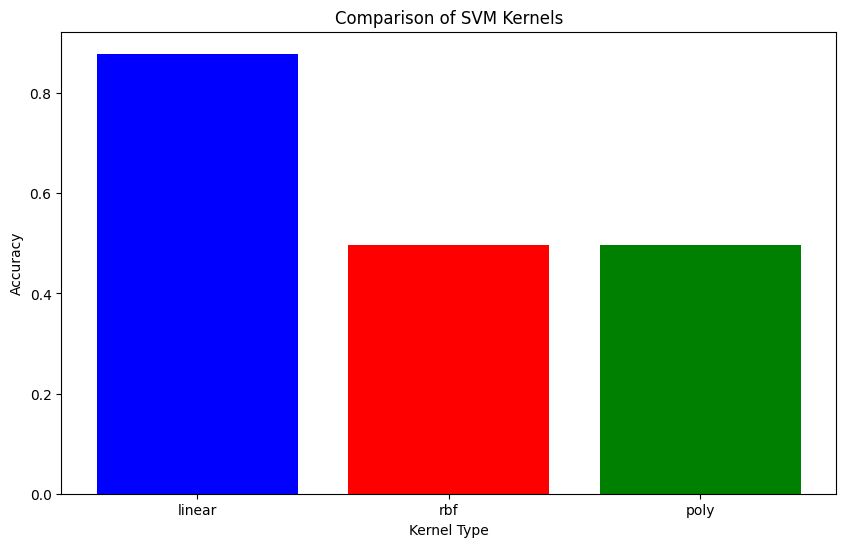

In [42]:
import matplotlib.pyplot as plt
# 存储每种核函数对应的准确率
accuracies = []

# 核函数类型
kernels = ['linear', 'rbf', 'poly']

# 对每种核函数训练模型并计算准确率
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy with {kernel} kernel: {accuracy:.4f}')

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.bar(kernels, accuracies, color=['blue', 'red', 'green'])
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM Kernels')
plt.xticks(kernels)
plt.show()

In [18]:
# 模型训练
svm_model = SVC(kernel='linear')  # 可以选择不同的核函数，如'rbf', 'poly'等
svm_model.fit(X_train, y_train)

# 模型评估
y_pred = svm_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8786127167630058


# 归一化

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with linear kernel: 0.9595
Accuracy with rbf kernel: 0.7861


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with poly kernel: 0.5549


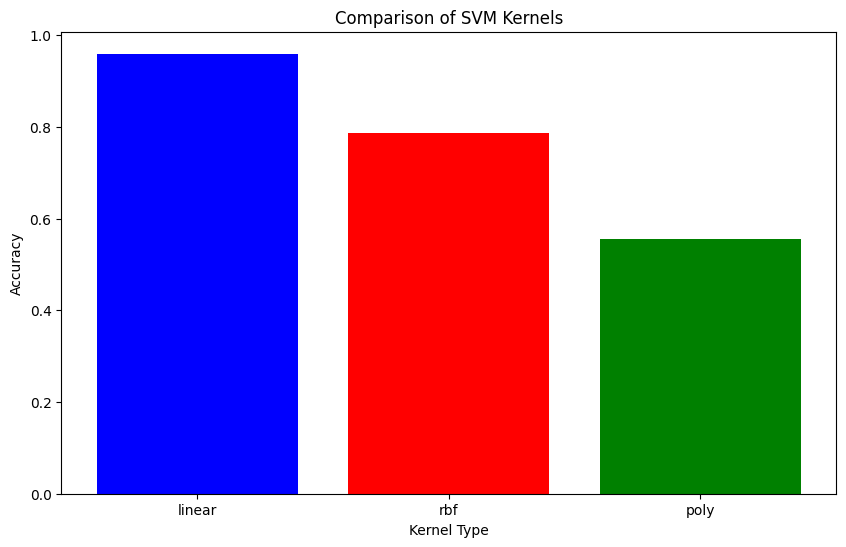

In [8]:
import matplotlib.pyplot as plt
# 存储每种核函数对应的准确率
accuracies = []

# 核函数类型
kernels = ['linear', 'rbf', 'poly']

# 对每种核函数训练模型并计算准确率
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy with {kernel} kernel: {accuracy:.4f}')

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.bar(kernels, accuracies, color=['blue', 'red', 'green'])
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM Kernels')
plt.xticks(kernels)
plt.show()

# 神经网络

# 未归一化

torch.Size([1556, 1])
tensor(2)
Epoch [1/100], Avg Loss: 3.1178, Avg Acc: 48.1362
Epoch [2/100], Avg Loss: 0.7919, Avg Acc: 50.0643
Epoch [3/100], Avg Loss: 0.7631, Avg Acc: 53.5347
Epoch [4/100], Avg Loss: 0.8826, Avg Acc: 50.7069
Epoch [5/100], Avg Loss: 0.8732, Avg Acc: 52.6992
Epoch [6/100], Avg Loss: 0.7829, Avg Acc: 49.8072
Epoch [7/100], Avg Loss: 0.8385, Avg Acc: 52.2494
Epoch [8/100], Avg Loss: 1.1153, Avg Acc: 51.6710
Epoch [9/100], Avg Loss: 0.9239, Avg Acc: 46.9152
Epoch [10/100], Avg Loss: 0.7260, Avg Acc: 53.1491
Epoch [11/100], Avg Loss: 0.8265, Avg Acc: 51.7995
Epoch [12/100], Avg Loss: 0.8388, Avg Acc: 50.7712
Epoch [13/100], Avg Loss: 0.8215, Avg Acc: 50.2571
Epoch [14/100], Avg Loss: 0.7216, Avg Acc: 50.3213
Epoch [15/100], Avg Loss: 0.7220, Avg Acc: 51.7995
Epoch [16/100], Avg Loss: 0.7294, Avg Acc: 52.1851
Epoch [17/100], Avg Loss: 0.7309, Avg Acc: 51.9280
Epoch [18/100], Avg Loss: 0.7172, Avg Acc: 51.0283
Epoch [19/100], Avg Loss: 0.7059, Avg Acc: 52.3136
Epoch [2

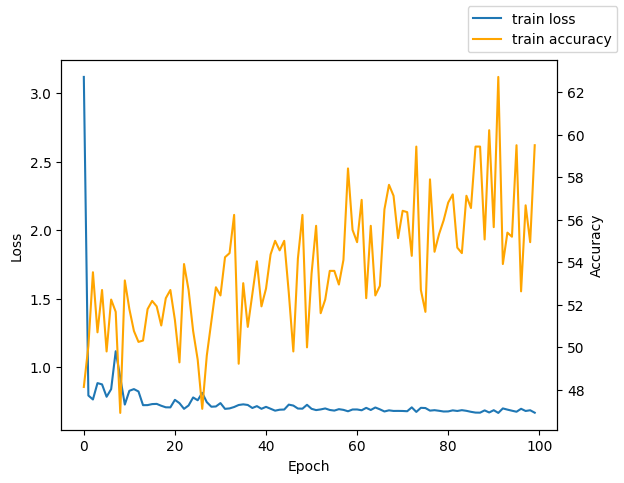

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
X = pd.read_csv("/opt/tiger/assignment/data.csv")
y = pd.read_csv("/opt/tiger/assignment/label.csv")
X.drop("Unnamed: 0", axis=1, inplace=True)
y.drop("Unnamed: 0", axis=1, inplace=True)
# y = sex_encoded  # 标签
# X = data  # 特征集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train_tensor = torch.tensor(np.array(X_train), dtype=torch.float32)
y_train_tensor = torch.tensor(np.array(y_train) , dtype=torch.long)
X_test_tensor = torch.tensor(np.array(X_test), dtype=torch.float32)
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.long)
print(y_train_tensor.shape)
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

input_size = 332  # 输入特征的数量
hidden_size = 100  # 隐藏层的大小
num_classes = torch.max(y_train_tensor) + 1  # 类别的数量
model = MLP(input_size, hidden_size, num_classes)
print(num_classes)
criterion = nn.CrossEntropyLoss()  # 用于多分类问题的损失函数
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)

train_losses = []  # 存储每一轮的损失
train_accs = []  # 存储每一轮的准确率
num_epochs = 100  # 训练的轮数

for epoch in range(num_epochs):
    total_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.squeeze(1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 统计损失和准确率
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # 计算平均损失和准确率进行记录
    avg_loss = total_loss / len(train_loader)
    avg_acc = 100.0 * correct / total

    train_losses.append(avg_loss)
    train_accs.append(avg_acc)

    # 打印每个epoch的损失和准确率
    print(f'Epoch [{epoch+1}/{num_epochs}], Avg Loss: {avg_loss:.4f}, Avg Acc: {avg_acc:.4f}')

# 画图可视化训练过程
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(train_losses, label='train loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax2 = ax.twinx()
ax2.plot(train_accs, label='train accuracy', color='orange')
ax2.set_ylabel('Accuracy')
fig.legend()
plt.show()

# 归一化

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [23]:
X = pd.read_csv("/opt/tiger/assignment/data.csv")
y = pd.read_csv("/opt/tiger/assignment/label.csv")
X.drop("Unnamed: 0", axis=1, inplace=True)
y.drop("Unnamed: 0", axis=1, inplace=True)
# y = sex_encoded  # 标签
# X = data  # 特征集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(np.array(y_train) , dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.long)

In [25]:
print(y_train_tensor.shape)

torch.Size([1556, 1])


In [26]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

input_size = 332  # 输入特征的数量
hidden_size = 100  # 隐藏层的大小
num_classes = torch.max(y_train_tensor) + 1  # 类别的数量
model = MLP(input_size, hidden_size, num_classes)

In [27]:
print(num_classes)

tensor(2)


In [28]:
criterion = nn.CrossEntropyLoss()  # 用于多分类问题的损失函数
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch [1/100], Avg Loss: 0.6311, Avg Acc: 64.5244
Epoch [2/100], Avg Loss: 0.4251, Avg Acc: 80.2699
Epoch [3/100], Avg Loss: 0.2527, Avg Acc: 89.3959
Epoch [4/100], Avg Loss: 0.1623, Avg Acc: 93.1877
Epoch [5/100], Avg Loss: 0.1172, Avg Acc: 94.9229
Epoch [6/100], Avg Loss: 0.0722, Avg Acc: 97.4293
Epoch [7/100], Avg Loss: 0.0528, Avg Acc: 97.8149
Epoch [8/100], Avg Loss: 0.0493, Avg Acc: 98.3933
Epoch [9/100], Avg Loss: 0.0352, Avg Acc: 98.5219
Epoch [10/100], Avg Loss: 0.0227, Avg Acc: 99.3573
Epoch [11/100], Avg Loss: 0.0209, Avg Acc: 99.4859
Epoch [12/100], Avg Loss: 0.0181, Avg Acc: 99.5501
Epoch [13/100], Avg Loss: 0.0199, Avg Acc: 99.2288
Epoch [14/100], Avg Loss: 0.0186, Avg Acc: 99.2931
Epoch [15/100], Avg Loss: 0.0250, Avg Acc: 99.2288
Epoch [16/100], Avg Loss: 0.0237, Avg Acc: 99.4859
Epoch [17/100], Avg Loss: 0.0119, Avg Acc: 99.8072
Epoch [18/100], Avg Loss: 0.0094, Avg Acc: 99.6144
Epoch [19/100], Avg Loss: 0.0051, Avg Acc: 99.8072
Epoch [20/100], Avg Loss: 0.0036, Avg Ac

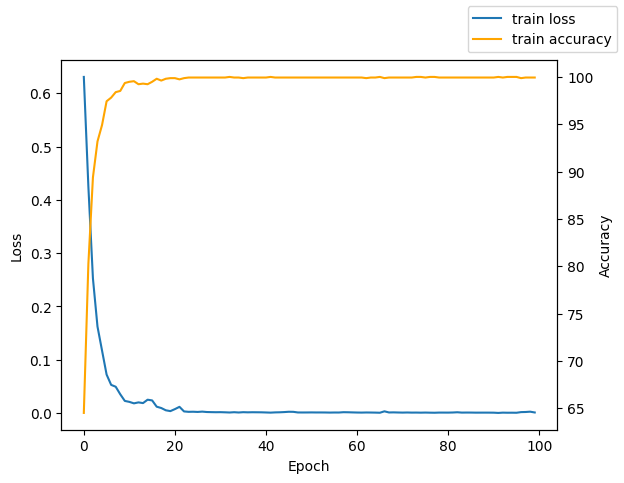

In [29]:
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)

train_losses = []  # 存储每一轮的损失
train_accs = []  # 存储每一轮的准确率
num_epochs = 100  # 训练的轮数

for epoch in range(num_epochs):
    total_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.squeeze(1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 统计损失和准确率
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # 计算平均损失和准确率进行记录
    avg_loss = total_loss / len(train_loader)
    avg_acc = 100.0 * correct / total

    train_losses.append(avg_loss)
    train_accs.append(avg_acc)

    # 打印每个epoch的损失和准确率
    print(f'Epoch [{epoch+1}/{num_epochs}], Avg Loss: {avg_loss:.4f}, Avg Acc: {avg_acc:.4f}')

# 画图可视化训练过程
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(train_losses, label='train loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax2 = ax.twinx()
ax2.plot(train_accs, label='train accuracy', color='orange')
ax2.set_ylabel('Accuracy')
fig.legend()
plt.show()

In [31]:
model.eval()  # 将模型设置为评估模式
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32):
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        labels = labels.squeeze(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy * 100}')

Accuracy: 92.48554913294798


## grid search

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 假设 X_train, X_test, y_train, y_test 已经被定义和准备好

# 定义参数网格
layer_sizes = [i*50 for i in range(1, 5)]  # 1层，大小从50到200，间隔50
hidden_layer_sizes = [[l1] for l1 in layer_sizes] + \
                    [[l1, l2] for l1 in layer_sizes for l2 in layer_sizes]

param_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'random_state': [42]
}

# 创建MLPClassifier实例
mlp = MLPClassifier(max_iter=100)

# 创建GridSearchCV实例
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# 执行网格搜索
grid_search.fit(X_train_scaled, y_train)

# 打印最佳参数和最佳分数
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

# 可视化网格搜索结果
results = grid_search.cv_results_

Fitting 3 folds for each of 40 candidates, totalling 120 fits


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged 

Best parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': [150, 50], 'random_state': 42, 'solver': 'adam'}
Best cross-validation score: 0.8367529379090074


In [86]:
print(results.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_activation', 'param_alpha', 'param_hidden_layer_sizes', 'param_random_state', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


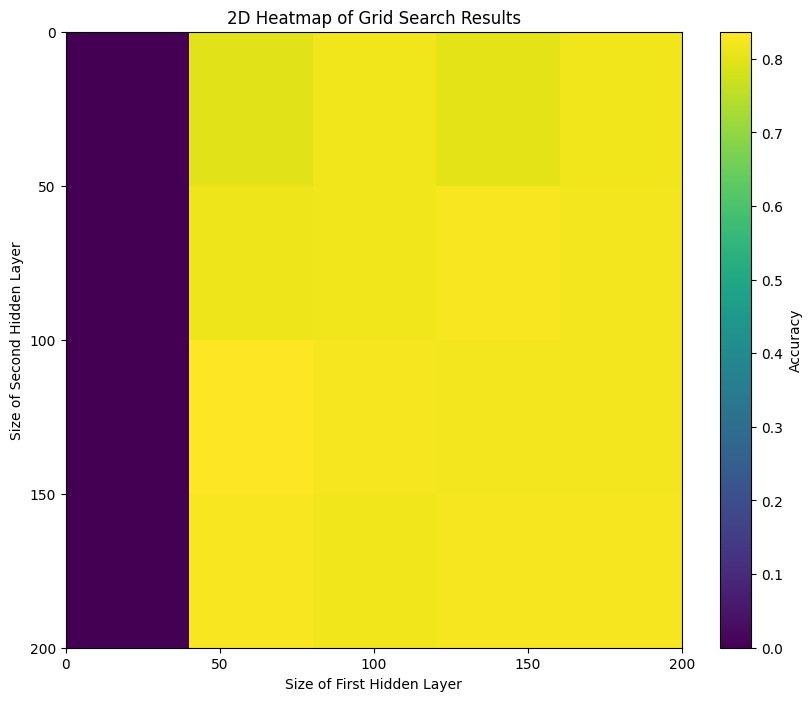

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 unique_layer_sizes 已经被定义，并且包含了从50到200，间隔为50的所有层大小
unique_layer_sizes = np.arange(0, 201, 50).tolist()

# 创建一个二维网格来存储准确率
accuracy_grid = np.zeros((len(unique_layer_sizes)-1, len(unique_layer_sizes)))

# 提取参数组合和平均准确率
params = results['params']
mean_accuracies = results['mean_test_score']

# 填充准确率网格
for param, acc in zip(params, mean_accuracies):
    layer_sizes_ = param['hidden_layer_sizes']
    idx1 = unique_layer_sizes.index(layer_sizes_[0])-1  # 第一层的大小
    if len(layer_sizes_) == 2:  # 双层网络
        idx2 = unique_layer_sizes.index(layer_sizes_[1])  # 第二层的大小
        accuracy_grid[idx1, idx2] = acc

# 创建二维可视化
fig, ax = plt.subplots(figsize=(10, 8))

# 为二维图创建层数网格
x, y = np.meshgrid(unique_layer_sizes, unique_layer_sizes)

# 绘制热力图，并设置 extent 以匹配 unique_layer_sizes 的值
im = ax.imshow(accuracy_grid, interpolation='nearest', cmap='viridis',
              extent=(unique_layer_sizes[0], unique_layer_sizes[-1], 
                      unique_layer_sizes[-1], unique_layer_sizes[0]))

# 设置坐标轴标签和标题
ax.set_xlabel('Size of First Hidden Layer')
ax.set_ylabel('Size of Second Hidden Layer')
ax.set_title('2D Heatmap of Grid Search Results')

# 设置坐标轴刻度为实际的层大小值
ax.set_xticks(unique_layer_sizes)
ax.set_yticks(unique_layer_sizes)

# 设置坐标轴刻度的标签为层大小的值
ax.set_xticklabels(unique_layer_sizes)
ax.set_yticklabels(unique_layer_sizes)

# 添加颜色条
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Accuracy')

# 显示图表
plt.show()